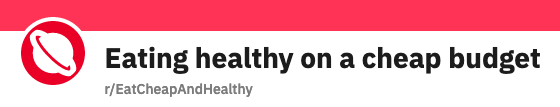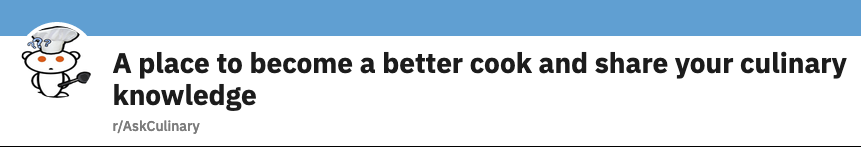

<img> <src="" width ="500" height=500 >

<img><src="../impages/askculinary_header.png" width ="500" height=500 ><img>

### The two subreddits picked here are about food but the focuses are slightly different. 
- **askculinary**
    - The first thing an reddit user sees when connecting to the subreddit is
        - A place to become a better cook and share your culinary knowledge
    - It has very specific guideline to its users for what to do and what not to do:
         - We're best at:
             - Troubleshooting dishes/menus
             - Equipment questions
             - Food science
             - Questions about technique
             - So please Keep Questions:
                 - Specific (Have a goal in mind!)
                 - Detailed (Include the recipe, pictures etc.)
          - What not to do:
              - NO SPECIFIC QUESTIONS OF FOOD SAFETY.
              - NO RECIPE REQUESTS. 
              - NO BRAINSTORMING.
              - NO BRAND RECOMMENDATIONS or "What piece of equipment should I get?"
              - NO GENERAL DISCUSSION.
              - NO SURVEYS.
              - DON'T COME HERE JUST TO PICK A FIGHT.
- **eatcheapandhealthy**
    - Eating healthy on a cheap budget
    - [MOD POST] Before you post, asking questions for recipes, please use our search bar. Trust us...your question has been asked before.
    


### Since askculinary has a very specific guideline to its users, 
    - I am going to make askculinary my target reddit.
    - I am curious about how well its users follow the guideline. 
    - Can we use this model to detect new postings that violte the guideline before they hit the post buttom? 
        - Sending the user a pop-up message to make the post somewhere else. 
---
### A few questions I can think of to ask here including:
Since eatcheapandhealthy users have a higher tendency to incert images to their posts, I am going to try the analysis with title first. 
- Is the length of titles different? 
    - My observtion and assumption is askculinary might have longer titles becuase
        - its users are expected to be specific with detail
- What are words used or more frequently used in one subreddit than the other? 
- Since askculinary is more technical, skills, and equipment focused, does this subject and discussion reflect this focuse?
- Even though askculinary asks its users not to request recipes:
    - I would assume the word 'recipe' is still frequently used in this community, because:
        - users are allowed toask questions about problems with certain recipes
        - users might have to post the whole recipe when ask a question
---
### Modeling with **KNeighborsClassifier** and **Logistic Regression** with **TfidfVectorizer**

Since context is very important here to distinguish which post is from which subreddit, I am going to use **TfidfVectorizer** approach here. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from nltk.stem import WordNetLemmatizer
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]


from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df = pd.read_csv('../data/dsi_project_EatCheapvsAskCulinary.csv')

In [3]:
df.head()

,title,score,id,url,comms_num,created,body,subreddit
0,Does Gabapentin lower your libido?,0,jd1o3h,https://www.reddit.com/r/EatCheapAndHealthy/co...,0,1.602992e+09,\n\n[View Poll](https://www.reddit.com/poll/jd...,eatcheapandhealthy
1,Broccoli Meatball Melange,1,jd0pv3,https://www.reddit.com/r/EatCheapAndHealthy/co...,0,1.602989e+09,"I was feeling bored, yet creative. I also want...",eatcheapandhealthy
2,"Savory oatmeal recipes, what's your favorite?",1,jd0i1w,https://www.reddit.com/r/EatCheapAndHealthy/co...,4,1.602988e+09,Edit: formatting \n\nI wanted to share this be...,eatcheapandhealthy
3,Bad roommates who are always outside in the li...,2,jd02ur,https://www.reddit.com/r/EatCheapAndHealthy/co...,5,1.602987e+09,So I don’t like using my kitchen for longer th...,eatcheapandhealthy
4,Need some suggestions in regards to imitation ...,1,jd02kr,https://www.reddit.com/r/EatCheapAndHealthy/co...,0,1.602987e+09,I wanted to incorporate these into my groceryl...,eatcheapandhealthy


In [4]:
df = df[['title','subreddit']]

In [5]:
df.head()

,title,subreddit
0,Does Gabapentin lower your libido?,eatcheapandhealthy
1,Broccoli Meatball Melange,eatcheapandhealthy
2,"Savory oatmeal recipes, what's your favorite?",eatcheapandhealthy
3,Bad roommates who are always outside in the li...,eatcheapandhealthy
4,Need some suggestions in regards to imitation ...,eatcheapandhealthy


In [6]:
df[df['subreddit'] == 'eatcheapandhealthy'].tail()

,title,subreddit
830,I dont know what Im doing wrong with dried bea...,eatcheapandhealthy
831,Vietname Fresh Spring Rolls Gỏi cuốn with 3 di...,eatcheapandhealthy
832,LPT: Ditch store bought dressings and elevate ...,eatcheapandhealthy
833,What are your favourite freezable meals which ...,eatcheapandhealthy
834,Canned Crabmeat recipes,eatcheapandhealthy


In [7]:
df[df['subreddit'] == 'askculinary'].tail()

,title,subreddit
1829,Can you use milk instead of water in a rice co...,askculinary
1830,Weekly Discussion - What's Your Specialty?,askculinary
1831,Should a roux be equal parts fat and flour? An...,askculinary
1832,Pressure/boil/slow cooking meat,askculinary
1833,Can you mix veggies in to make flavored gnocch...,askculinary


In [8]:
df['subreddit'].value_counts()

askculinary           999
eatcheapandhealthy    835
Name: subreddit, dtype: int64

In [9]:
df.isnull().sum()

title        0
subreddit    0
dtype: int64

## Explore title length

In [10]:
df['title_length'] = df['title'].str.len()

In [11]:
df.head()

,title,subreddit,title_length
0,Does Gabapentin lower your libido?,eatcheapandhealthy,34
1,Broccoli Meatball Melange,eatcheapandhealthy,25
2,"Savory oatmeal recipes, what's your favorite?",eatcheapandhealthy,45
3,Bad roommates who are always outside in the li...,eatcheapandhealthy,162
4,Need some suggestions in regards to imitation ...,eatcheapandhealthy,56


In [12]:
df.groupby('subreddit').mean()

,title_length
subreddit,
askculinary,50.347347
eatcheapandhealthy,52.627545


### Exemine the most lengthy title from both subreddits

In [13]:
df.groupby('subreddit')['title_length'].max()

subreddit
askculinary           291
eatcheapandhealthy    267
Name: title_length, dtype: int64

In [14]:
pd.set_option("display.max_colwidth", None)

In [15]:
df[df['title_length'] == 291]['title']
    # This one actually looked like something not to do? 

1646    I saw someone post about touching raw meat and if they were being paranoid about cross-contamination and I wanted to piggy back: why can you use the same tongs to flip a piece of chicken (for instance) before it is fully cooked or stir ground beef as it is cooking and not have to wash them?
Name: title, dtype: object

In [16]:
df[df['title_length'] == 267]['title']
    # Cheap and filling!!

118    Eggs are so versatile and make a cheap, protein packed, filling meal. Most weeks I make an omelet/pancake based meal. Countries around the world have their own versions so they're a different flavour each time. See post for several recipe ideas from around the world.
Name: title, dtype: object

### Exemine the shortest title from both subreddits

In [17]:
df.groupby('subreddit')['title_length'].min()

subreddit
askculinary           5
eatcheapandhealthy    4
Name: title_length, dtype: int64

In [18]:
df[df['subreddit'] == 'eatcheapandhealthy'].sort_values('title_length', ascending = True).head()

,title,subreddit,title_length
160,HELP,eatcheapandhealthy,4
469,Help,eatcheapandhealthy,4
138,Pasta,eatcheapandhealthy,5
36,Beans,eatcheapandhealthy,5
248,Apples,eatcheapandhealthy,6


In [19]:
df[df['subreddit'] == 'askculinary'].sort_values('title_length', ascending = True).head()

,title,subreddit,title_length
1593,Spice,askculinary,5
1239,Baking,askculinary,6
979,WTDuck,askculinary,6
1694,Polenta,askculinary,7
1634,Question,askculinary,8


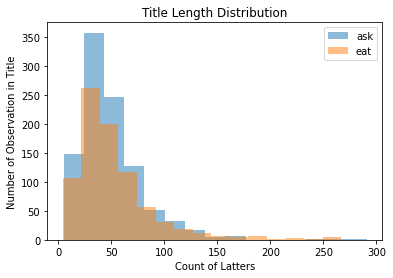

<Figure size 432x288 with 0 Axes>

In [41]:
askculinary = df[df['subreddit'] == 'askculinary']['title_length']
eatcheapandhealthy = df[df['subreddit'] == 'eatcheapandhealthy']['title_length']

#bins = numpy.linspace(-10, 10, 100)

title_length_hist = plt.hist(askculinary, bins=15, alpha=0.5, label='ask')
plt.hist(eatcheapandhealthy, bins=15, alpha=0.5, label='eat')
plt.title('Title Length Distribution')
plt.xlabel('Count of Latters')
plt.ylabel('Number of Observation in Title')
plt.legend(loc='upper right')
plt.show()

plt.savefig("../charts/title_length_hist.png")
#plt.savefig(title_length_hist, dpi=None, facecolor='w', edgecolor='w',
#        orientation='portrait', papertype=None, format=None,
#        transparent=False, bbox_inches=None, pad_inches=0.1,
#        frameon=None, metadata=None)

From the chart above, the distribution of title length from both subreddits look very similar. 

## Explore word counts

In [21]:
def word_count(string):
    return len(list(string.split(' ')))

In [22]:
df['title_word_count'] = df['title'].apply(word_count)

In [23]:
df.groupby('subreddit').mean()['title_word_count']

subreddit
askculinary           9.023023
eatcheapandhealthy    9.299401
Name: title_word_count, dtype: float64

### Exemine title with the most word_count

In [24]:
df.groupby('subreddit')['title_word_count'].max()

subreddit
askculinary           56
eatcheapandhealthy    51
Name: title_word_count, dtype: int64

In [25]:
df[df['title_word_count'] == 56]['title']
    # This one is both longest in word_count and title_length

1646    I saw someone post about touching raw meat and if they were being paranoid about cross-contamination and I wanted to piggy back: why can you use the same tongs to flip a piece of chicken (for instance) before it is fully cooked or stir ground beef as it is cooking and not have to wash them?
Name: title, dtype: object

In [26]:
df[df['title_word_count'] == 51]['title']
    # Cheap and healthy!!

695    I can't stand the taste of beans but I want to eat more as they are cheap and healthy. I have roasted lentils and I love the taste as the "bean" taste gets cooked off. Would I get the same effect with other beans such as black, pinto, and kidney beans?
Name: title, dtype: object

### Exemine title with the least word count

In [27]:
df.groupby('subreddit')['title_word_count'].min()

subreddit
askculinary           1
eatcheapandhealthy    1
Name: title_word_count, dtype: int64

In [28]:
df[df['subreddit'] == 'eatcheapandhealthy'].sort_values('title_word_count', ascending = True).head()

,title,subreddit,title_length,title_word_count
169,Bologna,eatcheapandhealthy,7,1
606,Frustrated!,eatcheapandhealthy,11,1
160,HELP,eatcheapandhealthy,4,1
249,Garlic!,eatcheapandhealthy,7,1
550,Panzanella,eatcheapandhealthy,10,1


In [29]:
df[df['subreddit'] == 'askculinary'].sort_values('title_word_count', ascending = True).head()

,title,subreddit,title_length,title_word_count
1593,Spice,askculinary,5,1
1239,Baking,askculinary,6,1
1634,Question,askculinary,8,1
979,WTDuck,askculinary,6,1
1694,Polenta,askculinary,7,1


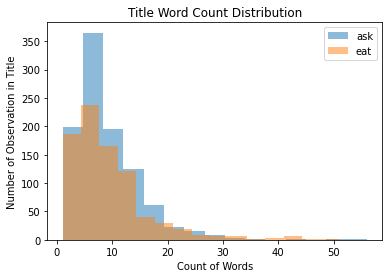

In [42]:
askculinary_wc = df[df['subreddit'] == 'askculinary']['title_word_count']
eatcheapandhealthy_wc = df[df['subreddit'] == 'eatcheapandhealthy']['title_word_count']

#bins = numpy.linspace(-10, 10, 100)

plt.hist(askculinary_wc, bins=15, alpha=0.5, label='ask')
plt.hist(eatcheapandhealthy_wc, bins=15, alpha=0.5, label='eat')
plt.title('Title Word Count Distribution')
plt.xlabel('Count of Words')
plt.ylabel('Number of Observation in Title')
plt.legend(loc='upper right')
plt.legend(loc='upper right')
plt.show()

### Conclusion of observation:
- There is no noticeable difference between the mean title length and title word count
- The distribution of title length and word count from both subreddits are similar, too. 
- Even it's the single word title, there are differences obsered between two subreddits
    - from eatcheapandhealthy: words like help, frastracted make the title a bit general 
    - from askculinary: words used are more specific and more category words.  

## Binarizing the target column

In [31]:
df['is_ask'] = df['subreddit'].map({'askculinary': 1, 'eatcheapandhealthy': 0})

In [32]:
df['is_ask'].value_counts()

1    999
0    835
Name: is_ask, dtype: int64

df.to_csv('../cleaned_data/title_reproduce_firstEDA.csv', index = False)

In [44]:
X = df['title']
y = df['is_ask']

## TfidfVectorizer the titile for text analysis

#### Single word
- From the top 15 most commonly observed list of each subreddit:
    - Not much overlap between two lists
    - Cheap, health, recipe/recipes show up in the eatcheapandhealthy subreddit top 15

In [45]:
#Instantiate the transformer.
#lemmatizer = WordNetLemmatizer()
#tvec = TfidfVectorizer(stop_words='english', tokenizer=LemmaTokenizer())
tvec = TfidfVectorizer(stop_words='english')

In [46]:
X_tvec_df = pd.DataFrame(tvec.fit_transform(X).todense(),
                         columns=tvec.get_feature_names())

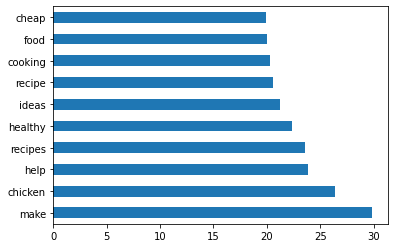

In [47]:
X_tvec_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

In [48]:
X_tvec_df = pd.concat([df, X_tvec_df], axis = 1) 

In [49]:
X_tvec_df.head(1)

,title,subreddit,title_length,title_word_count,is_ask,000,05,10,100,1000,...,zesty,zojirushi,zone,zucchini,zucchinis,éclair,über,šaltibarščius,دقة,يمنية
0,Does Gabapentin lower your libido?,eatcheapandhealthy,34,5,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
(X_tvec_df[X_tvec_df['subreddit'] == 'eatcheapandhealthy']
    .drop(columns = ['title', 'subreddit', 'title_length', 'title_word_count', 'is_ask'])
    .sum()
    .sort_values(ascending = False)
    .head(15))

healthy     22.308044
recipes     21.916744
ideas       20.376810
cheap       19.762820
meal        15.900997
make        14.367783
meals       14.348460
food        13.876692
easy        13.574156
eat         13.254133
recipe      13.101949
help        12.239155
rice        11.328580
favorite    10.875961
beans       10.103201
dtype: float64

In [51]:
(X_tvec_df[X_tvec_df['subreddit'] == 'askculinary']
    .drop(columns = ['title', 'subreddit', 'title_length', 'title_word_count', 'is_ask'])
    .sum()
    .sort_values(ascending = False)
    .head(15))

chicken     16.960224
make        15.450656
sauce       15.225647
cooking     14.857310
question    13.280356
use         12.637157
help        11.618064
baking      10.714353
does        10.635115
cheese      10.054821
pan          9.986992
meat         9.886377
cream        9.868514
making       9.455435
milk         8.674033
dtype: float64

Text(0.5, 0, 'Observed in # of message')

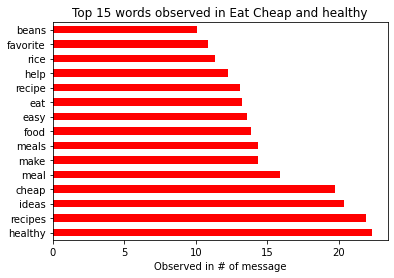

In [107]:
(X_tvec_df[X_tvec_df['subreddit'] == 'eatcheapandhealthy']
    .drop(columns = ['title', 'subreddit', 'title_length', 'title_word_count', 'is_ask'])
    .sum()
    .sort_values(ascending = False)
    .head(15)).plot(kind='barh', color='red');
plt.title('Top 15 words observed in Eat Cheap and healthy')
plt.xlabel('Observed in # of message')

Text(0.5, 0, 'Observed in # of message')

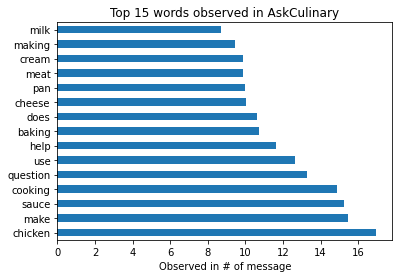

In [101]:
(X_tvec_df[X_tvec_df['subreddit'] == 'askculinary']
    .drop(columns = ['title', 'subreddit', 'title_length', 'title_word_count', 'is_ask'])
    .sum()
    .sort_values(ascending = False)
    .head(15)).plot(kind='barh');
plt.title('Top 15 words observed in AskCulinary')
plt.xlabel('Observed in # of message')

In [54]:
(X_tvec_df[X_tvec_df['subreddit'] == 'eatcheapandhealthy']
    .drop(columns = ['title', 'subreddit', 'title_length', 'title_word_count', 'is_ask'])
    .sum()
    .sort_values(ascending = False)
    .tail(10))

fluffy        0.0
reason        0.0
flavourful    0.0
flip          0.0
flipping      0.0
floaty        0.0
read          0.0
flow          0.0
fluffier      0.0
يمنية         0.0
dtype: float64

In [55]:
(X_tvec_df[X_tvec_df['subreddit'] == 'askculinary']
    .drop(columns = ['title', 'subreddit', 'title_length', 'title_word_count', 'is_ask'])
    .sum()
    .sort_values(ascending = False)
    .tail(10))

sleep      0.0
issues     0.0
slices     0.0
curried    0.0
goal       0.0
curious    0.0
pearl      0.0
item       0.0
items      0.0
000        0.0
dtype: float64

## Compare bigram and trigram

In [56]:
text = df['title']

### bigram

In [57]:
# Getting trigrams  
tvec_b = TfidfVectorizer(stop_words='english', ngram_range = (2,2)) 
tvec_big = tvec_b.fit_transform(text)  
features = (tvec_b.get_feature_names()) 
print("\n\nFeatures : \n", features) 
print("\n\nX1 : \n", X1.toarray()) 



Features : 
 ['000 500cal', '05 ounces', '10 40', '10 ingredients', '10 minute', '10 minutes', '10 week', '100 healthy', '100 month', '1000 calorie', '11 195', '11 tuna', '110 pounds', '12 hour', '12 hours', '12 inch', '12 lbs', '12 meals', '12 portable', '12 weeks', '14 days', '140 calorie', '15 20', '15 fat', '150 week', '18 count', '195 lbs', '1981 pure', '1cup oil', '1lb beans', '1lb black', '20 minutes', '20 pounds', '20 years', '200 250', '200 grocery', '200g protein', '21 5cm', '21 recipes', '24 hours', '24hours copycat', '250 budget', '250g quaker', '260lbs im', '2lbs home', '30 minutes', '30 pounds', '30 years', '30cm pot', '32 serving', '350 450', '350 month', '350f water', '360 calories', '3s supplement', '40 dinner', '40 minutes', '400 calories', '45 worth', '4h taste', '4h turned', '50 liters', '50 uk', '500 calls', '500cal day', '5cm burner', '60 serving', '600 lbs', '700 hot', '84 substitute', '92 serving', '_______ sandwich', 'aa degree', 'able flavor', 'able score', 

NameError: name 'X1' is not defined

In [58]:
tvec_big_df = pd.DataFrame(tvec_big.todense(), 
                          columns=tvec_b.get_feature_names())

In [108]:
# plot top occuring words
tvec_big_df.sum().sort_values(ascending = False).head(10)
    ## These top 10 words don't really have meaning on its own.
    ## Don't help to distinguish ham from spam

cheap healthy      7.330360
cast iron          4.598146
need help          4.456416
sous vide          4.217600
best way           4.146916
stir fry           3.530230
cream cheese       3.283157
rice cooker        2.997658
peanut butter      2.894589
stainless steel    2.883908
dtype: float64

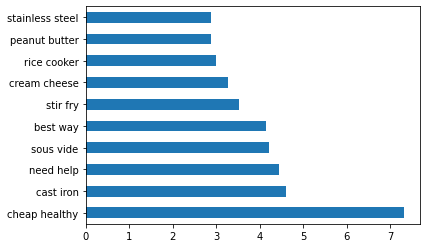

In [59]:
# plot top occuring words
tvec_big_df.sum().sort_values(ascending = False). head(10).plot(kind = 'barh');
    ## These top 10 words don't really have meaning on its own.
    ## Don't help to distinguish ham from spam

In [60]:
big_all = pd.concat([df, tvec_big_df], axis = 1) 

In [61]:
big_all.head(1)

,title,subreddit,title_length,title_word_count,is_ask,000 500cal,05 ounces,10 40,10 ingredients,10 minute,...,zucchini eggplant,zucchini feta,zucchini tomato,zucchini vegetable,zucchini yellow,zucchinis amazing,éclair filling,über sandwich,šaltibarščius lithuanian,دقة يمنية
0,Does Gabapentin lower your libido?,eatcheapandhealthy,34,5,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
(big_all[big_all['subreddit'] == 'eatcheapandhealthy']
    .drop(columns = ['title', 'subreddit', 'title_length', 'title_word_count', 'is_ask'])
    .sum()
    .sort_values(ascending = False)
    .head(10))

cheap healthy     7.330360
peanut butter     2.894589
overnight oats    2.859926
meal ideas        2.725606
need help         2.703691
healthy meal      2.556240
cheap easy        2.516954
recipe ideas      2.373393
meal prep         2.368860
eat cheap         2.239555
dtype: float64

Text(0.5, 0, 'Observed in # of message')

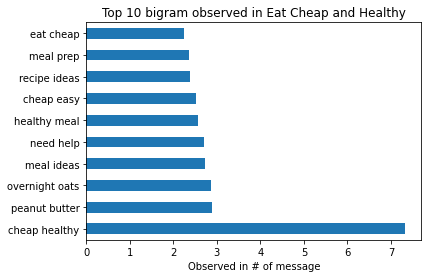

In [65]:
(big_all[big_all['subreddit'] == 'eatcheapandhealthy']
    .drop(columns = ['title', 'subreddit', 'title_length', 'title_word_count', 'is_ask'])
    .sum()
    .sort_values(ascending = False)
    .head(10)).plot(kind='barh');

plt.title('Top 10 bigram observed in Eat Cheap and Healthy')
plt.xlabel('Observed in # of message')

In [67]:
(big_all[big_all['subreddit'] == 'askculinary']
    .drop(columns = ['title', 'subreddit', 'title_length', 'title_word_count', 'is_ask'])
    .sum()
    .sort_values(ascending = False)
    .head(15))

cast iron          4.598146
sous vide          4.217600
best way           3.271095
cream cheese       3.008568
stainless steel    2.883908
cutting board      2.408071
chicken stock      2.364895
pork chops         2.283522
stir fry           2.278960
mac cheese         2.152461
fried chicken      2.098610
cheese sauce       2.040183
pork belly         1.955898
cooking steak      1.947261
steel pan          1.946906
dtype: float64

Text(0.5, 0, 'Observed in # of message')

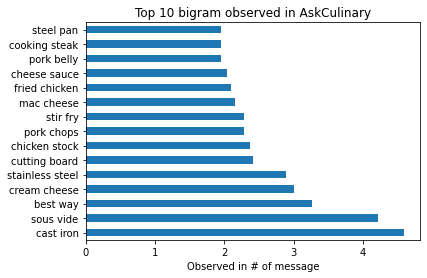

In [70]:
(big_all[big_all['subreddit'] == 'askculinary']
    .drop(columns = ['title', 'subreddit', 'title_length', 'title_word_count', 'is_ask'])
    .sum()
    .sort_values(ascending = False)
    .head(15)).plot(kind='barh');

plt.title('Top 10 bigram observed in AskCulinary')
plt.xlabel('Observed in # of message')

### Trigram

In [71]:
# Getting trigrams  
tvec = TfidfVectorizer(stop_words='english', ngram_range = (3,3)) 
trig = tvec.fit_transform(text)  
features = (tvec.get_feature_names()) 
print("\n\nFeatures : \n", features) 
print("\n\nX1 : \n", X1.toarray()) 



Features : 
 ['000 500cal day', '05 ounces heavier', '10 40 minutes', '10 ingredients 400', '10 minute lunch', '10 week meal', '100 healthy serving', '1000 calorie meals', '11 195 lbs', '11 tuna sandwich', '110 pounds potatoes', '12 hours stew', '12 inch 30cm', '12 inch fry', '12 lbs onions', '12 meals 12', '12 portable induction', '12 weeks friend', '14 days self', '140 calorie banana', '15 20 minutes', '15 fat cream', '150 week people', '18 count eggs', '195 lbs wanting', '1981 pure cordyceps', '1cup oil greek', '1lb beans overnight', '1lb black beans', '20 years garlic', '200 250 budget', '200 grocery budget', '200g protein day', '21 5cm burner', '21 recipes 25', '24 hours lemon', '24hours copycat recipe', '250g quaker golden', '260lbs im cutting', '2lbs home smoked', '30 minutes make', '30 pounds regain', '30 years old', '30cm pot work', '350 month budget', '350f water isn', '360 calories serving', '3s supplement ideas', '40 minutes vs', '400 calories serving', '45 worth packaged

NameError: name 'X1' is not defined

In [73]:
trig_df = pd.DataFrame(trig.todense(), 
                          columns=tvec.get_feature_names())

Text(0.5, 1.0, 'Trigram')

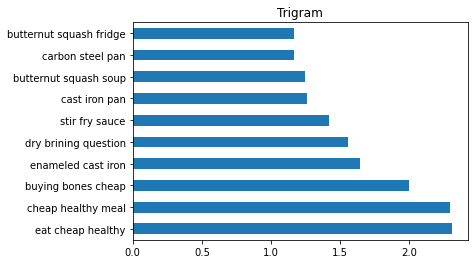

In [74]:
# plot top occuring words
trig_df.sum().sort_values(ascending = False). head(10).plot(kind = 'barh');
plt.title('Trigram')

In [75]:
trig_all = pd.concat([df, trig_df], axis = 1) 

In [76]:
trig_all.head(1)

,title,subreddit,title_length,title_word_count,is_ask,000 500cal day,05 ounces heavier,10 40 minutes,10 ingredients 400,10 minute lunch,...,zojirushi rice cooker,zucchini cucumbers don,zucchini dish question,zucchini eggplant capsicum,zucchini feta cheese,zucchini vegetable noodles,zucchini yellow squash,éclair filling question,über sandwich gif,šaltibarščius lithuanian beet
0,Does Gabapentin lower your libido?,eatcheapandhealthy,34,5,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
(trig_all[trig_all['subreddit'] == 'eatcheapandhealthy']
    .drop(columns = ['title', 'subreddit', 'title_length', 'title_word_count', 'is_ask'])
    .sum()
    .sort_values(ascending = False)
    .head(10))

eat cheap healthy            2.308881
cheap healthy meal           2.298415
buying bones cheap           2.000000
good meal ideas              1.116427
high protein snacks          1.037056
looking tuna recipes         1.000000
new birth control            1.000000
cooking cockroach kitchen    1.000000
meal plan week               1.000000
hulled barley bulk           1.000000
dtype: float64

Text(0.5, 0, 'Observed in # of message')

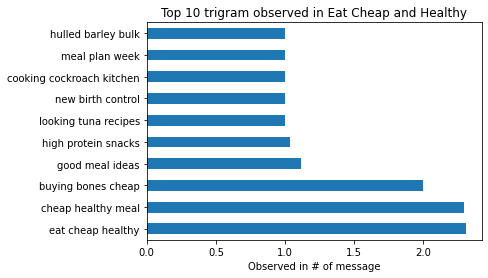

In [78]:
(trig_all[trig_all['subreddit'] == 'eatcheapandhealthy']
    .drop(columns = ['title', 'subreddit', 'title_length', 'title_word_count', 'is_ask'])
    .sum()
    .sort_values(ascending = False)
    .head(10)).plot(kind='barh');

plt.title('Top 10 trigram observed in Eat Cheap and Healthy')
plt.xlabel('Observed in # of message')

In [79]:
(trig_all[trig_all['subreddit'] == 'askculinary']
    .drop(columns = ['title', 'subreddit', 'title_length', 'title_word_count', 'is_ask'])
    .sum()
    .sort_values(ascending = False)
    .head(10))

enameled cast iron       1.642079
dry brining question     1.556875
cast iron pan            1.257758
butternut squash soup    1.244922
carbon steel pan         1.168229
stainless steel pan      1.168229
cream cheese frosting    1.005890
save spicy chili         1.000000
advice pork shoulder     1.000000
tell boiled beef         1.000000
dtype: float64

Text(0.5, 0, 'Observed in # of message')

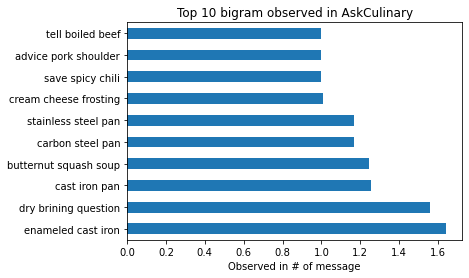

In [80]:
(trig_all[trig_all['subreddit'] == 'askculinary']
    .drop(columns = ['title', 'subreddit', 'title_length', 'title_word_count', 'is_ask'])
    .sum()
    .sort_values(ascending = False)
    .head(10)).plot(kind='barh');

plt.title('Top 10 bigram observed in AskCulinary')
plt.xlabel('Observed in # of message')

## Apply Vader
---
- Perform Vader to get sentiment score to see 
- Is there a noticeable sentiment difference between posts from two subreddits?
    - My hypothesis here is there should be no difference

In [81]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [82]:
corpus = list(df['title'])

In [83]:
#instantiate SIA
sia = SentimentIntensityAnalyzer()

In [84]:
#Get polarity scores for the first tweet
sia.polarity_scores(corpus[0])

{'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}

In [85]:
#create dataframe that contains text and the polarity scores for each tweet

dicts = []    

for title in corpus:
    scores = sia.polarity_scores(title)
    scores['title'] = title
    dicts.append(scores)

vader = pd.DataFrame(dicts)
vader.head()

,neg,neu,pos,compound,title
0,0.355,0.645,0.000,-0.2960,Does Gabapentin lower your libido?
1,0.000,1.000,0.000,0.0000,Broccoli Meatball Melange
2,0.000,0.625,0.375,0.4588,"Savory oatmeal recipes, what's your favorite?"
3,0.103,0.733,0.164,0.2732,"Bad roommates who are always outside in the living room near the kitchen. What can I make in under two minutes that is insanely easy, quick, healthy, and filling?"
4,0.000,1.000,0.000,0.0000,Need some suggestions in regards to imitation crab meat.


In [86]:
X_tvec_df.head(2)

,title,subreddit,title_length,title_word_count,is_ask,000,05,10,100,1000,...,zesty,zojirushi,zone,zucchini,zucchinis,éclair,über,šaltibarščius,دقة,يمنية
0,Does Gabapentin lower your libido?,eatcheapandhealthy,34,5,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Broccoli Meatball Melange,eatcheapandhealthy,25,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
X_tvec_df.shape

(1834, 2987)

In [88]:
vader.shape

(1834, 5)

In [89]:
X_tvec_vader = pd.concat([X_tvec_df, vader], axis=1)

In [90]:
X_tvec_vader.head(2)

,title,subreddit,title_length,title_word_count,is_ask,000,05,10,100,1000,...,éclair,über,šaltibarščius,دقة,يمنية,neg,neu,pos,compound,title
0,Does Gabapentin lower your libido?,eatcheapandhealthy,34,5,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.355,0.645,0.0,-0.296,Does Gabapentin lower your libido?
1,Broccoli Meatball Melange,eatcheapandhealthy,25,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,1.000,0.0,0.000,Broccoli Meatball Melange


In [91]:
vader_isask = X_tvec_vader[['is_ask', 'neg', 'neu', 'pos', 'compound']]

In [92]:
vader_isask.head()

,is_ask,neg,neu,pos,compound
0,0,0.355,0.645,0.000,-0.2960
1,0,0.000,1.000,0.000,0.0000
2,0,0.000,0.625,0.375,0.4588
3,0,0.103,0.733,0.164,0.2732
4,0,0.000,1.000,0.000,0.0000


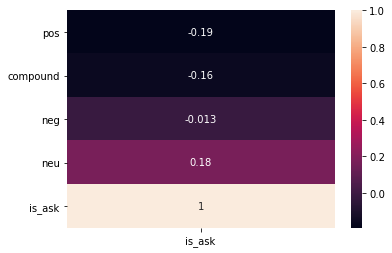

In [93]:
#sns.heatmap(df.corr()[['bpm']].sort_values('bpm'), annot = True)

sns.heatmap(vader_isask.corr()[['is_ask']].sort_values('is_ask'), annot = True)

/Users/narschang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/narschang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/narschang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/narschang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


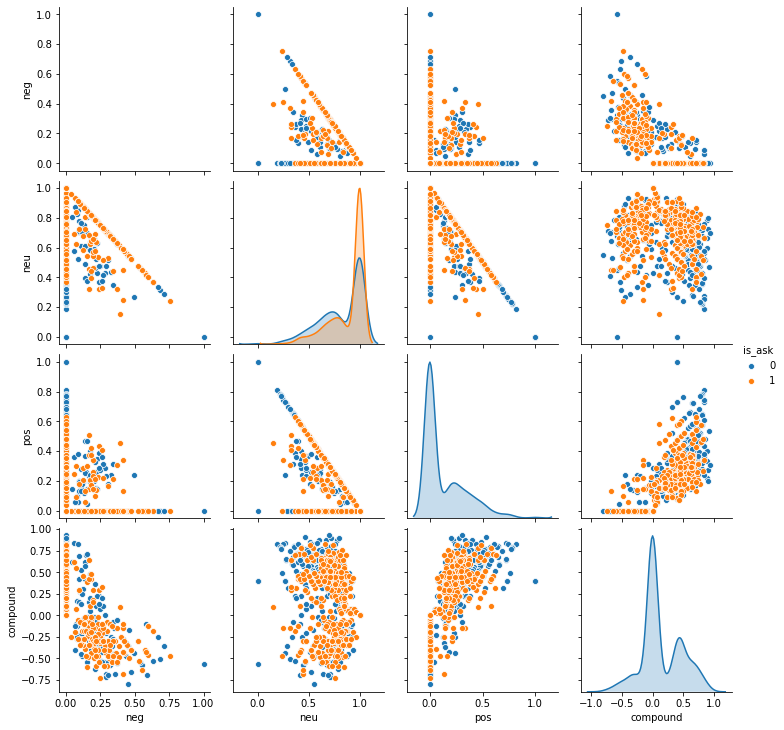

In [94]:
sns.pairplot(vader_isask, hue='is_ask');

In [95]:
vader_isask.describe()

,is_ask,neg,neu,pos,compound
count,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000
mean,0.544711,0.042834,0.860178,0.096992,0.093886
std,0.498133,0.114114,0.193101,0.168195,0.286716
min,0.000000,0.000000,0.000000,0.000000,-0.802000
25%,0.000000,0.000000,0.734000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.181750,0.296000
max,1.000000,1.000000,1.000000,1.000000,0.925100


Text(0, 0.5, 'From AskCulinary or not')

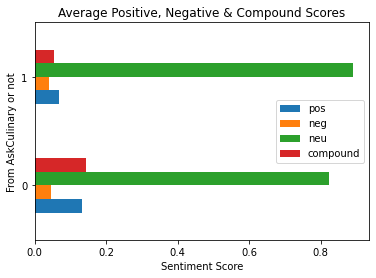

In [112]:
#Plot the average positivity, negativity and compound scores for Real vs Not Real Disasters:

vader_isask.groupby('is_ask').mean()[['pos', 'neg', 'neu', 'compound']].plot(kind='barh')
plt.title('Average Positive, Negative & Compound Scores');
plt.xlabel('Sentiment Score')
plt.ylabel('From AskCulinary or not')

# 1 is real disaster and 0 is fake disaster

### Conclusion of Vader investigation
- There is no noticeable correlation between posts of two subreddits

In [96]:
X_tvec_vader.to_csv('../cleaned_data/title_tvec_vader.csv', index = False)